In [1]:
!pip install -Uqq fastbook
import fastbook
#fastbook.setup_book()

     |████████████████████████████████| 727kB 7.7MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 204kB 18.7MB/s 
     |████████████████████████████████| 1.2MB 18.9MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!unzip -u "/content/drive/My Drive/Deep/FocusedBirds.zip" -d "/content/drive/My Drive/Deep/Birdsounds"
#!unzip -u "/content/drive/My Drive/Deep/TrainImages.zip" -d "/content/drive/My Drive/Deep/Birdsounds"
!unzip -u "/content/drive/My Drive/Deep/Bird500.zip" -d "/content/drive/My Drive/Deep/Birdsounds/train_short_audio"

Archive:  /content/drive/My Drive/Deep/Bird500.zip
warning [/content/drive/My Drive/Deep/Bird500.zip]:  45317897 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [/content/drive/My Drive/Deep/Bird500.zip]:  start of central directory not found;
  zipfile corrupt.
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [ ]:

import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import shutil, math, os

In [ ]:
root = '/content/drive/My Drive/Deep/'
audio_path = root + 'Birdsounds/train_short_audio/'
test_path = audio_path + 'XC1619.ogg'

image_path = root + 'Images/'

In [ ]:
ipd.Audio(test_path)

In [ ]:
librosa.get_duration(filename=test_path)

82.11703125

In [ ]:
for recording in os.listdir(audio_path):
  filepath = audio_path + recording
  filename = recording.split('.')[0]
  offset = 0
  duration = 10
  for i in range(math.floor(librosa.get_duration(filename=filepath)/duration)):
    imagename = root + f'Images/{filename}-{offset}-{offset + duration}.png'
    if os.path.exists(imagename) : continue
    sig, rate = librosa.load(filepath, sr=32000, offset=offset, duration=duration)

    # First, compute the spectrogram using the "short-time Fourier transform" (stft)
    spec = librosa.stft(sig)

    # Scale the amplitudes according to the decibel scale
    spec_db = librosa.amplitude_to_db(spec, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(spec_db, 
                            sr=32000, 
                            x_axis='time', 
                            y_axis='hz', 
                            cmap=plt.get_cmap('viridis'))
    plt.savefig(imagename)
    plt.clf()
    plt.close('all')
    offset += duration

KeyboardInterrupt: ignored

In [ ]:
meta_df = pd.read_csv(root+'train_metadata.csv')
bird500 = meta_df[meta_df['primary_label'].map(meta_df['primary_label'].value_counts()) == 500]
bird500_gb = bird500.groupby('primary_label').apply(lambda x: x.sample(100, random_state=42))

offset = 2
duration = 10

for i, row in bird500_gb.iterrows():
    bird = row.primary_label
    file = row.filename
    filepath = audio_path + f'{bird}/{file}'
    filename = file.split('.')[0]
    
    
    imagename = root + f'TrainImages/{filename}.png'
    sig, rate = librosa.load(filepath, sr=32000, offset=offset, duration=duration)

    # First, compute the spectrogram using the "short-time Fourier transform" (stft)
    spec = librosa.stft(sig)

    # Scale the amplitudes according to the decibel scale
    spec_db = librosa.amplitude_to_db(spec, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(spec_db, 
                            sr=32000, 
                            x_axis='time', 
                            y_axis='hz', 
                            cmap=plt.get_cmap('viridis'))
    plt.savefig(imagename)
    plt.clf()
    plt.close('all')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

In [ ]:
import os
len(os.listdir('/content/drive/My Drive/Deep/Birdsounds/TrainImages'))

241

In [ ]:
from fastai.vision.all import *

In [ ]:
meta_df = pd.read_csv(root + 'train_metadata.csv')
meta_df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
0,acafly,['amegfi'],"['begging call', 'call', 'juvenile']",35.3860,-84.1250,Empidonax virescens,Acadian Flycatcher,Mike Nelson,2012-08-12,XC109605.ogg,Creative Commons Attribution-NonCommercial-ShareAlike 3.0,2.5,09:30,https://www.xeno-canto.org/109605
1,acafly,[],['call'],9.1334,-79.6501,Empidonax virescens,Acadian Flycatcher,Allen T. Chartier,2000-12-26,XC11209.ogg,Creative Commons Attribution-NonCommercial-ShareAlike 3.0,3.0,?,https://www.xeno-canto.org/11209
2,acafly,[],['call'],5.7813,-75.7452,Empidonax virescens,Acadian Flycatcher,Sergio Chaparro-Herrera,2012-01-10,XC127032.ogg,Creative Commons Attribution-NonCommercial-ShareAlike 3.0,3.0,15:20,https://www.xeno-canto.org/127032
3,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129974.ogg,Creative Commons Attribution-NonCommercial-ShareAlike 3.0,3.5,07:50,https://www.xeno-canto.org/129974
4,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129981.ogg,Creative Commons Attribution-NonCommercial-ShareAlike 3.0,3.5,07:50,https://www.xeno-canto.org/129981


In [ ]:
def get_bird_label(file):
    file = str(file.parts[-1])
    filename = file.split('-')[0] + '.ogg'
    bird_label = meta_df[meta_df['filename'] == filename]['primary_label'].values[0]
    return bird_label

In [ ]:
fns = get_image_files(image_path)
fns

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_bird_label,
    item_tfms=RandomResizedCrop(128))

In [ ]:
dls = birds.dataloaders(image_path)

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=error_rate).to_fp16()
learn.fit_one_cycle(4)
learn.unfreeze()
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


OSError: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

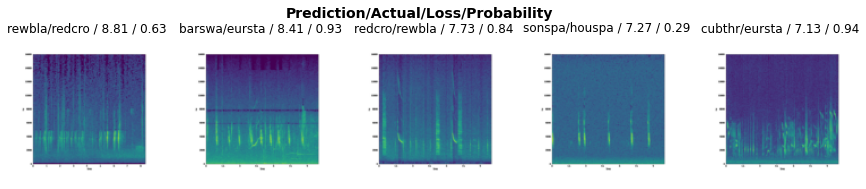

In [ ]:
interp.plot_top_losses(5, nrows=1)